<a href="https://colab.research.google.com/github/crea0414/1st_CVDL/blob/master/Day008_sobel_gaussian_blur_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 範例

實作模糊與邊緣檢測

- 透過 Gaussian Filter 實作模糊操作
- 透過 Sobel Filter 實作邊緣檢測

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import cv2, os
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img_path = '/content/drive/My Drive/First_CV_DL191125/lena.png'
img = cv2.imread(img_path)

## 模糊


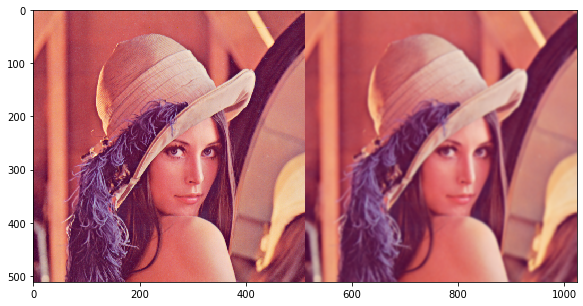

In [6]:
img_blur = img.copy()

# 重複多次 Gaussian 模糊的操作來加深模糊的程度
img_blur = cv2.GaussianBlur(img_blur, (5, 5), 0)
img_blur = cv2.GaussianBlur(img_blur, (5, 5), 0)
img_blur = cv2.GaussianBlur(img_blur, (5, 5), 0)

#　組合 + 顯示圖片
plt.figure(figsize=(10,5))
img_show = np.hstack((img, img_blur))
img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show);

## 邊緣檢測

### 組合 x-axis, y-axis 的影像合成

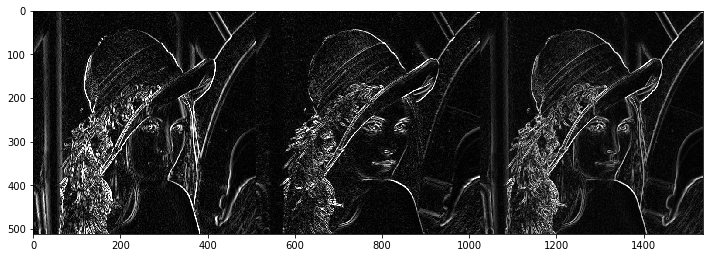

In [13]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 對 x 方向做 Sobel 邊緣檢測
img_sobel_x = cv2.Sobel(img_gray, cv2.CV_16S, dx=1, dy=0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

# 對 y 方向做 Sobel 邊緣檢測
img_sobel_y = cv2.Sobel(img_gray, cv2.CV_16S, dx=0, dy=1, ksize=3)
img_sobel_y = cv2.convertScaleAbs(img_sobel_y)

# x, y 方向的邊緣檢測後的圖各以一半的全重進行合成
img_sobel_combine = cv2.addWeighted(img_sobel_x, 0.5, img_sobel_y, 0.5, 0)

#　組合 + 顯示圖片
plt.figure(figsize=(12,7))
img_show = np.hstack((img_sobel_x, img_sobel_y, img_sobel_combine))
#img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show, 'gray');

# 作業

實作模糊與邊緣檢測

- 透過 Gaussian Filter 實作模糊操作
- 透過 Sobel Filter 實作邊緣檢測

## 邊緣檢測

### 比較 Sobel 如果在 uint8 的情況下做會 overflow 的狀況

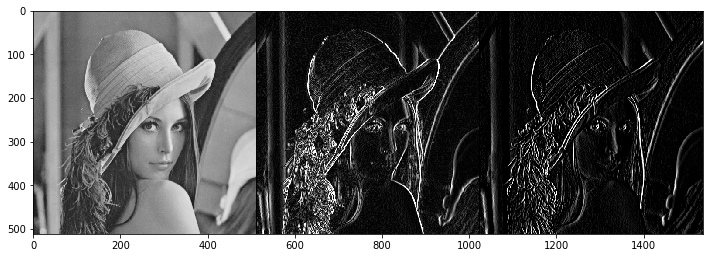

In [14]:
# 轉為灰階圖片
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 對 x 方向以包含負數的資料格式 (cv2.CV_16S) 進行 Sobel 邊緣檢測
img_sobel_x = cv2.Sobel(img_gray, cv2.CV_16S, dx=1, dy=0, ksize=3)

# 對 x 方向依照比例縮放到所有數值都是非負整數
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

# 對 x 方向直接以非負整數的資料格式 (uint8) 進行 Sobel 邊緣檢測
img_sobel_x_uint8 = cv2.Sobel(img_gray, cv2.CV_8U , dx=1, dy=0, ksize=3)

#　組合 + 顯示圖片
plt.figure(figsize=(12,7))
img_show = np.hstack((img_gray, img_sobel_x, img_sobel_x_uint8))
#img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show, 'gray');

### 比較一次與兩次計算偏微分的結果

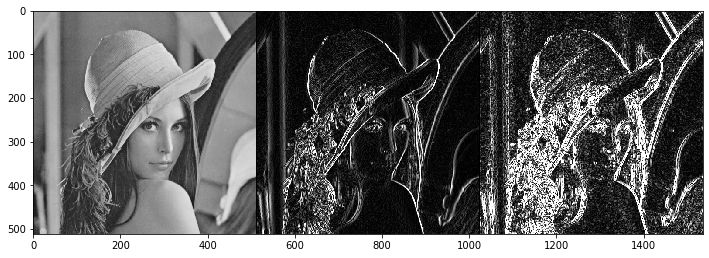

In [17]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 求一次導數取得邊緣檢測結果
img_sobel_x = cv2.Sobel(img_gray, cv2.CV_16S, dx=1, dy=0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)
# 求二次導數取得邊緣檢測結果
img_sobel_xx = cv2.Sobel(img_sobel_x, cv2.CV_16S, dx=1, dy=0, ksize=3)
img_sobel_xx = cv2.convertScaleAbs(img_sobel_xx)

#　組合 + 顯示圖片
img_show = np.hstack((img_grey, img_sobel_x, img_sobel_xx))
plt.figure(figsize=(12,7))
#img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show, 'gray');